<a href="https://colab.research.google.com/github/YugyeongJo/Movie-Dataset_Analysis_Project/blob/main/data_analysis/Dongwoo/SESAC_MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [67]:
import os
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [68]:
import pandas as pd

In [69]:
pwd

'/content'

In [70]:
movies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/movies_metadata.csv') # 데이터를 불러옵니다. 코랩 특성상 마운트 및 경로지정을 진행해야 하므로 절대 경로를 참조하였습니다.

<ipython-input-70-c917e62dc8e7>:1: DtypeWarning: Columns (0,1,3,8,16) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/movies_metadata.csv') # 데이터를 불러옵니다. 코랩 특성상 마운트 및 경로지정을 진행해야 하므로 절대 경로를 참조하였습니다.


In [71]:
movies.duplicated().sum() #데이터 중복 검사를 진행합니다. 255건의 데이터가 중복임이 확인 되었습니다.

255

In [72]:
movies = movies.drop_duplicates().reset_index(drop=True) #중복된 데이터를 제거합니다.

In [73]:
movies.duplicated().sum() #중복 데이터가 제대로 제거되었는지 확인합니다.

0

In [74]:
import matplotlib.pyplot as plt

In [75]:
movies.head()

,adult,budget,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,...,belongs_to_collection_poster_path,belongs_to_collection_backdrop_path,genre_id,genre_name,production_company_id,production_company_name,production_country_iso,production_country_name,spoken_language_iso,spoken_language_name
0,False,30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg,/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg,16.0,Animation,3.0,Pixar Animation Studios,US,United States of America,en,English
1,False,30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg,/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg,35.0,Comedy,3.0,Pixar Animation Studios,US,United States of America,en,English
2,False,30000000,http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,...,/7G9915LfUQ2lVfwMEEhDsn3kT4B.jpg,/9FBwqcd9IRruEDUrTdcaafOMKUq.jpg,10751.0,Family,3.0,Pixar Animation Studios,US,United States of America,en,English
3,False,65000000,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,NaN,NaN,12.0,Adventure,559.0,TriStar Pictures,US,United States of America,en,English
4,False,65000000,NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,...,NaN,NaN,12.0,Adventure,559.0,TriStar Pictures,US,United States of America,fr,Français


In [76]:
movies.columns

Index(['adult', 'budget', 'homepage', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'release_date', 'revenue', 'runtime', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'belongs_to_collection_id',
       'belongs_to_collection_name', 'belongs_to_collection_poster_path',
       'belongs_to_collection_backdrop_path', 'genre_id', 'genre_name',
       'production_company_id', 'production_company_name',
       'production_country_iso', 'production_country_name',
       'spoken_language_iso', 'spoken_language_name'],
      dtype='object')

In [77]:
# release_date : 시대
# genre_name : 장르

In [78]:
movies.columns

Index(['adult', 'budget', 'homepage', 'id', 'imdb_id', 'original_language',
       'original_title', 'overview', 'popularity', 'poster_path',
       'release_date', 'revenue', 'runtime', 'status', 'tagline', 'title',
       'video', 'vote_average', 'vote_count', 'belongs_to_collection_id',
       'belongs_to_collection_name', 'belongs_to_collection_poster_path',
       'belongs_to_collection_backdrop_path', 'genre_id', 'genre_name',
       'production_company_id', 'production_company_name',
       'production_country_iso', 'production_country_name',
       'spoken_language_iso', 'spoken_language_name'],
      dtype='object')

In [79]:
# 개봉일자가 12년 1년,, 등의 데이터가 존재하였고, 해당 데이터를 무시하기 위한 작업을 진행합니다.
def make_year(x) :
  if float(x) >= 1500 :
    return x
  else : return 0

In [81]:
movies['year'] = movies['release_date'].map(lambda x : str(x)[:4]) #개봉일자에서 개봉년도만 분리합니다.
movies['year'] = movies['year'].apply(make_year).map(lambda x : str(int(x)//10) + '0') #분리한 개봉년도에서 12년, 1년과 같은 비정상 데이터를 제외하기 위한 작업을 수행합니다.

In [52]:
year_revenue = movies.query('revenue != 0 and year != "00"').dropna(subset=['revenue']).groupby(['year'])['revenue'].mean().reset_index() #시대 별 영화 수입의 평균입니다.
year_revenue

,year,revenue
0,1910,8.081240e+06
1,1920,2.319014e+06
2,1930,2.276715e+07
3,1940,1.184729e+07
4,1950,2.562216e+07
5,1960,3.603552e+07
6,1970,5.860421e+07
7,1980,4.112088e+07
8,1990,7.657347e+07
9,2000,1.017330e+08


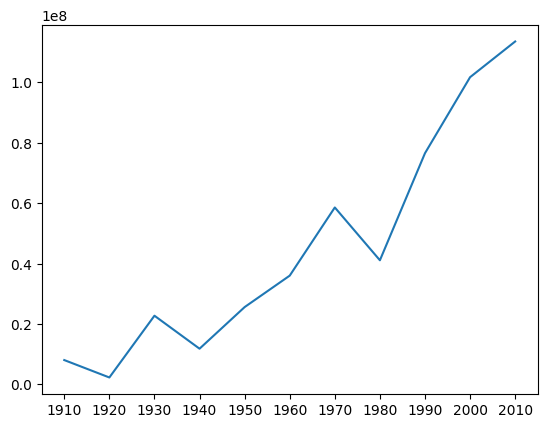

In [53]:
plt.plot(year_revenue['year'], year_revenue['revenue']) # 시대별 영화 수입은 우상향을 그리고있음을 확인할 수 있습니다.

In [54]:
y_g = movies.dropna(subset=['imdb_id','genre_name','year']).query('year != "00"').groupby(['year','genre_name'])['imdb_id'].count().reset_index()

y_g.head() #시대별로 어떤 장르가 인기가 있었는지 표현합니다,.

,year,genre_name,imdb_id
0,1870,Documentary,2
1,1880,Documentary,4
2,1890,Action,2
3,1890,Animation,1
4,1890,Comedy,10


In [55]:
# y_g.loc[y_g['genre_name']== "Comedy"]

In [56]:
# zero_list = []
# for i in y_g.genre_name.unique() :
#   if "1870" not in list(y_g.query('genre_name == @i')['year']) :
#     zero_list.append(['1870',i,0])

In [57]:
# pd.DataFrame(zero_list)

In [58]:
import matplotlib.pyplot as plt

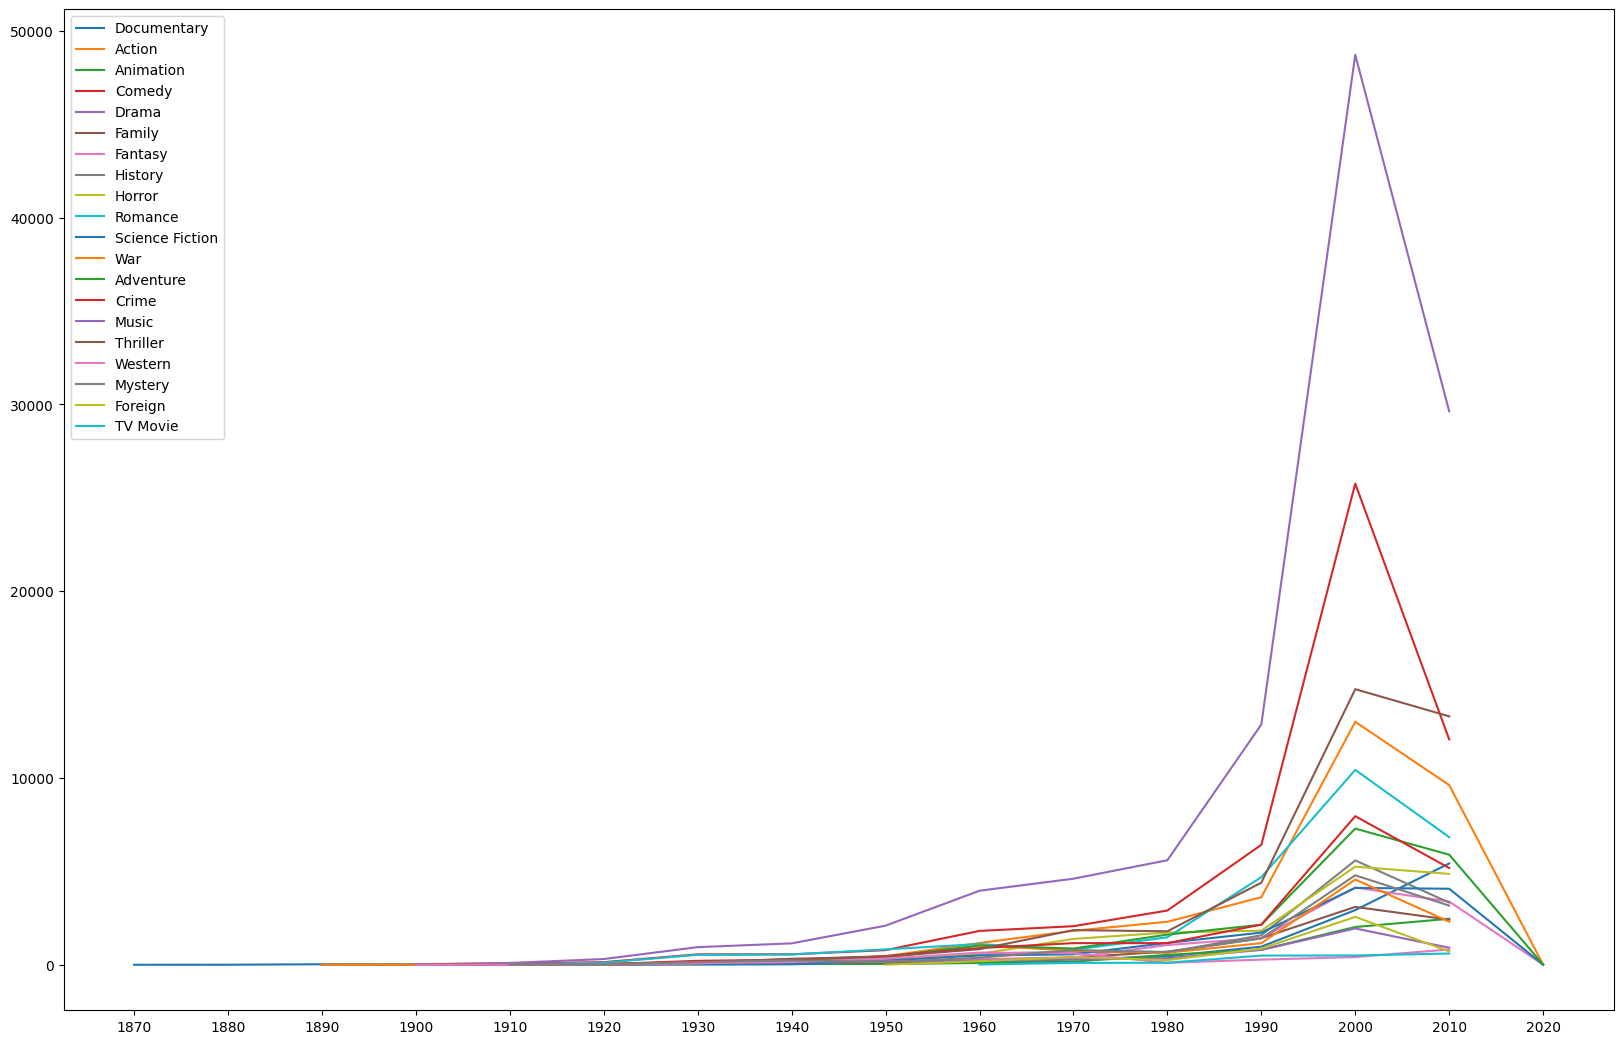

In [60]:
%matplotlib inline
plt.figure(figsize=(20,13))
for i in y_g.genre_name.unique() :
  data_x = y_g.query('genre_name == @i')['year']
  data_y = y_g.query('genre_name == @i')['imdb_id']
  plt.plot(data_x, data_y)
plt.legend(y_g.genre_name.unique(),loc = 'upper left')


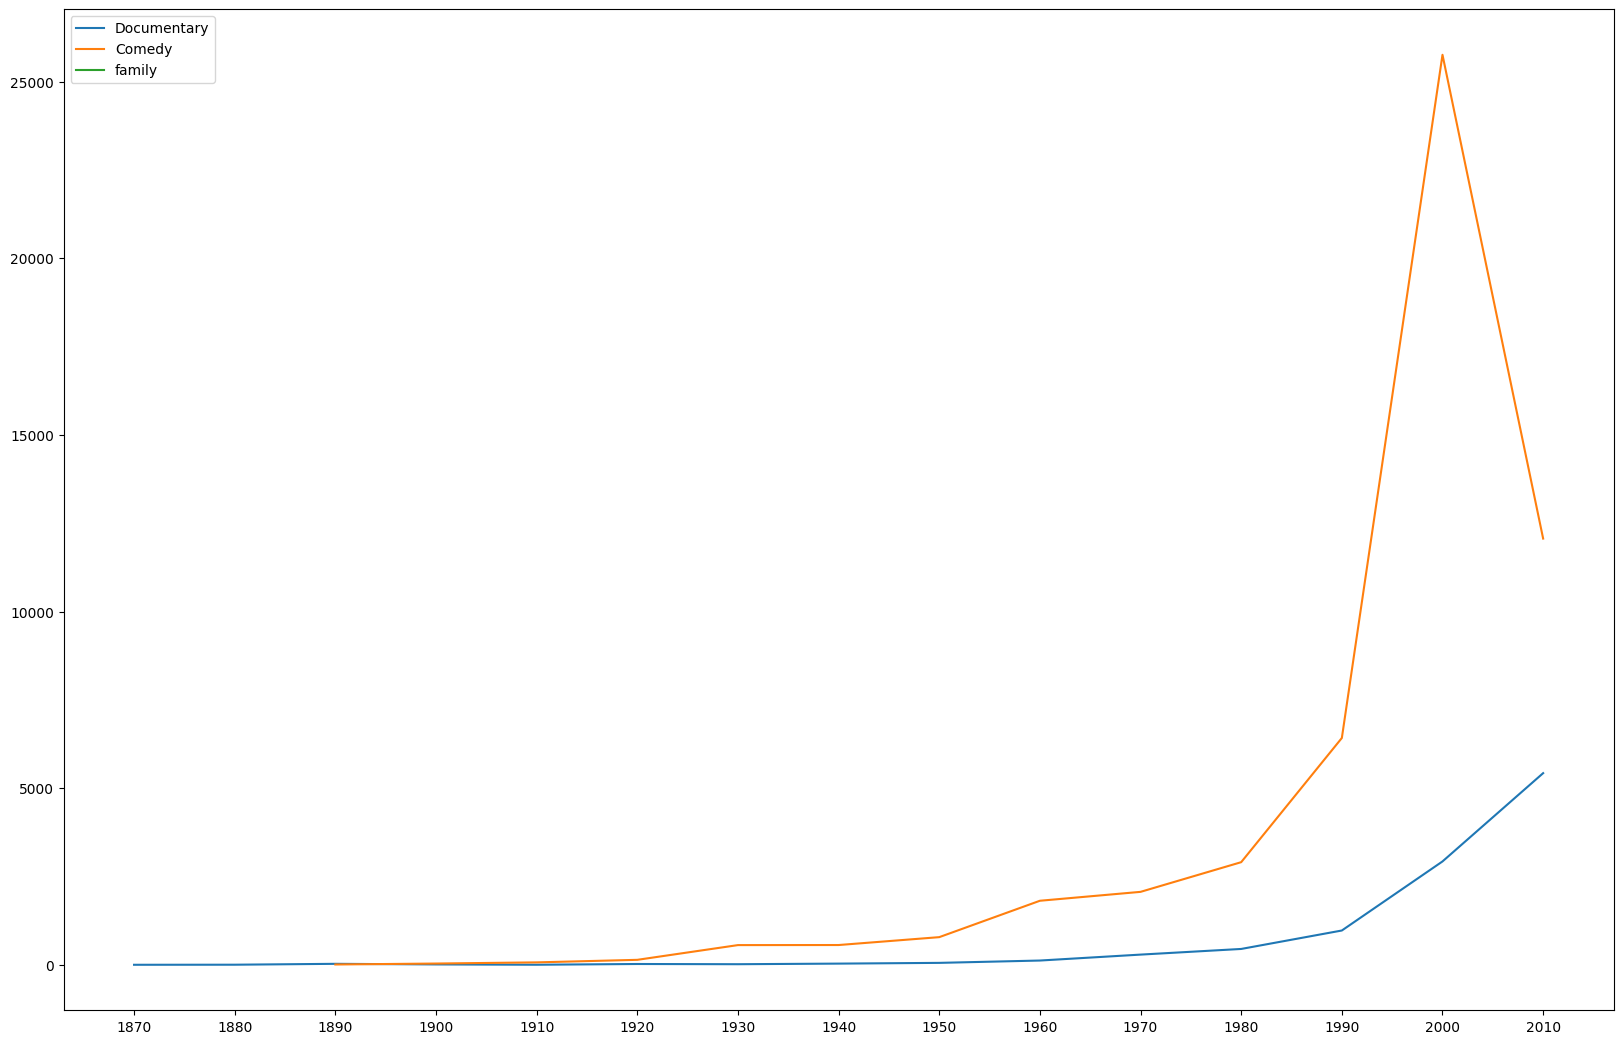

In [61]:
%matplotlib inline
plt.figure(figsize=(20,13))
genres = ['Documentary','Comedy','family'] # 원하는 장르를 특정하여 시대별 흐름을 관찰할 수 있습니다.
for i in genres :
  data_x = y_g.query('genre_name == @i')['year']
  data_y = y_g.query('genre_name == @i')['imdb_id']
  plt.plot(data_x, data_y)
plt.legend(genres,loc = 'upper left')


In [62]:
year_genre_revenue = movies.query('year != "00"').dropna(subset=['revenue']).groupby(['year','genre_name'])['revenue'].mean().reset_index() #시대에 따른 장르별 영화 수입의 평균입니다.
year_genre_revenue

,year,genre_name,revenue
0,1870,Documentary,0.000000e+00
1,1880,Documentary,0.000000e+00
2,1890,Action,0.000000e+00
3,1890,Animation,0.000000e+00
4,1890,Comedy,0.000000e+00
...,...,...,...
238,2010,Western,6.023995e+07
239,2020,Action,0.000000e+00
240,2020,Adventure,0.000000e+00
241,2020,Fantasy,0.000000e+00


In [63]:
year_genre_revenue.genre_name.unique()

array(['Documentary', 'Action', 'Animation', 'Comedy', 'Drama', 'Family',
       'Fantasy', 'History', 'Horror', 'Romance', 'Science Fiction',
       'War', 'Adventure', 'Crime', 'Music', 'Thriller', 'Western',
       'Mystery', 'Foreign', 'TV Movie'], dtype=object)

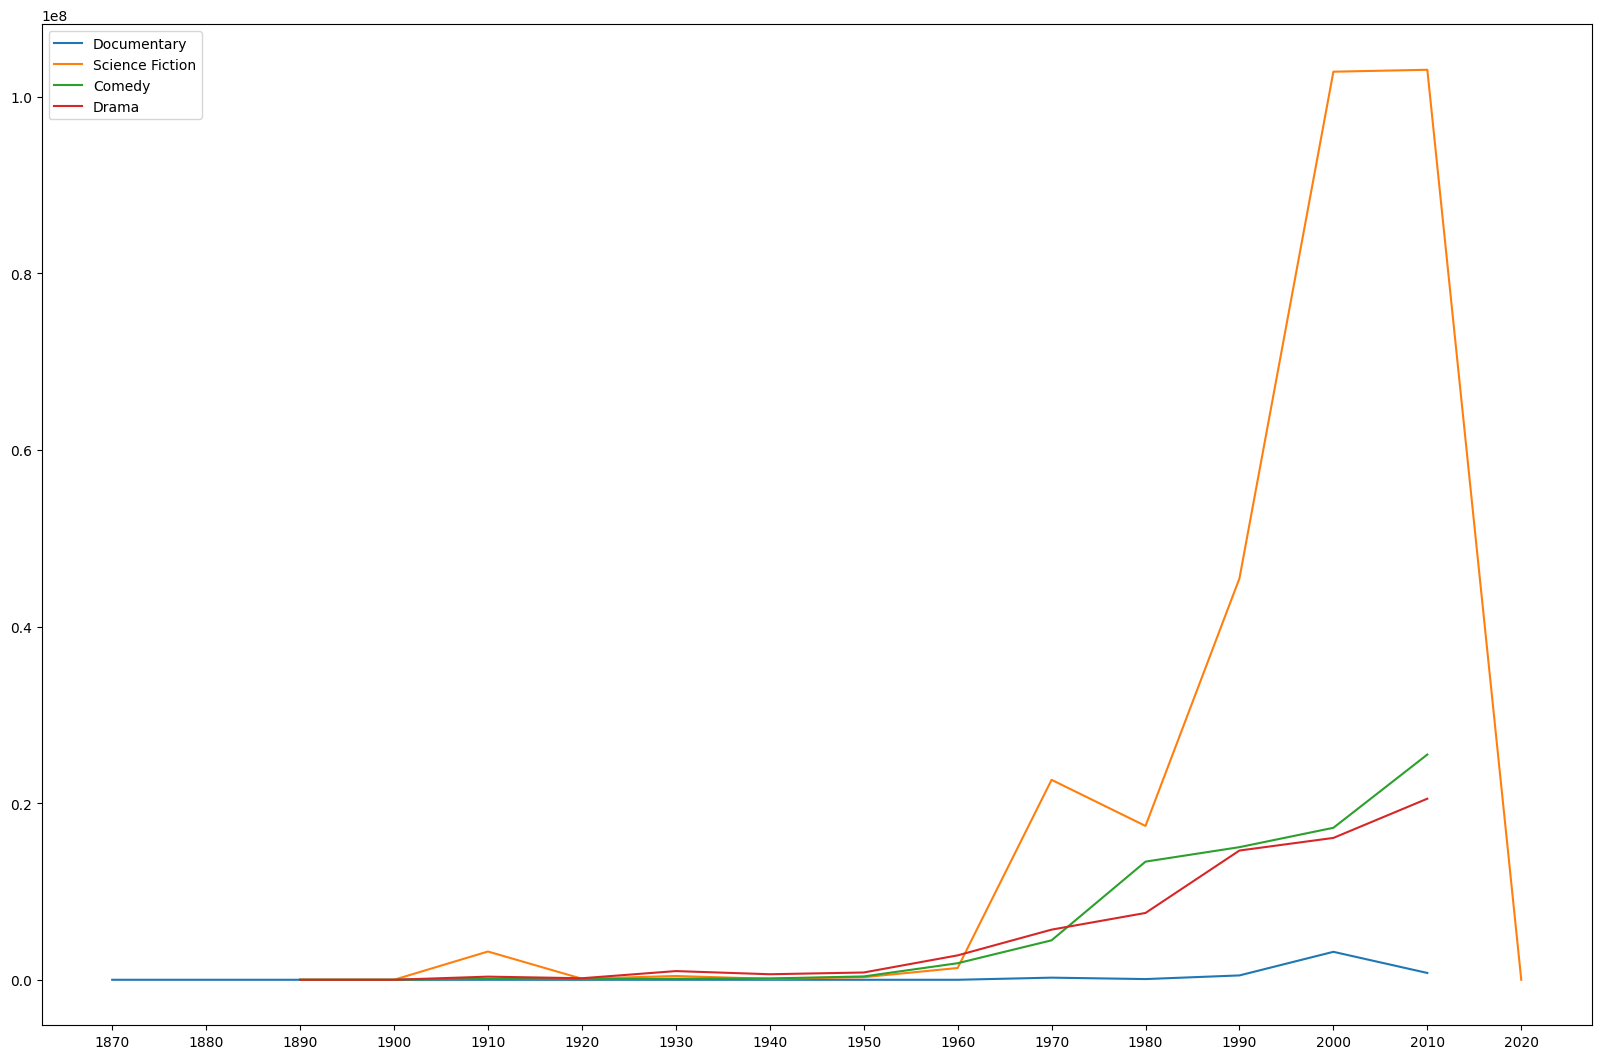

In [64]:
%matplotlib inline
plt.figure(figsize=(20,13))
genres = ['Documentary','Science Fiction','Comedy','Drama'] # 원하는 장르를 특정하여 시대별 흐름을 관찰할 수 있습니다.
for i in genres :
  data_x = year_genre_revenue.query('genre_name == @i')['year']
  data_y = year_genre_revenue.query('genre_name == @i')['revenue']
  plt.plot(data_x, data_y)
plt.legend(genres,loc = 'upper left')

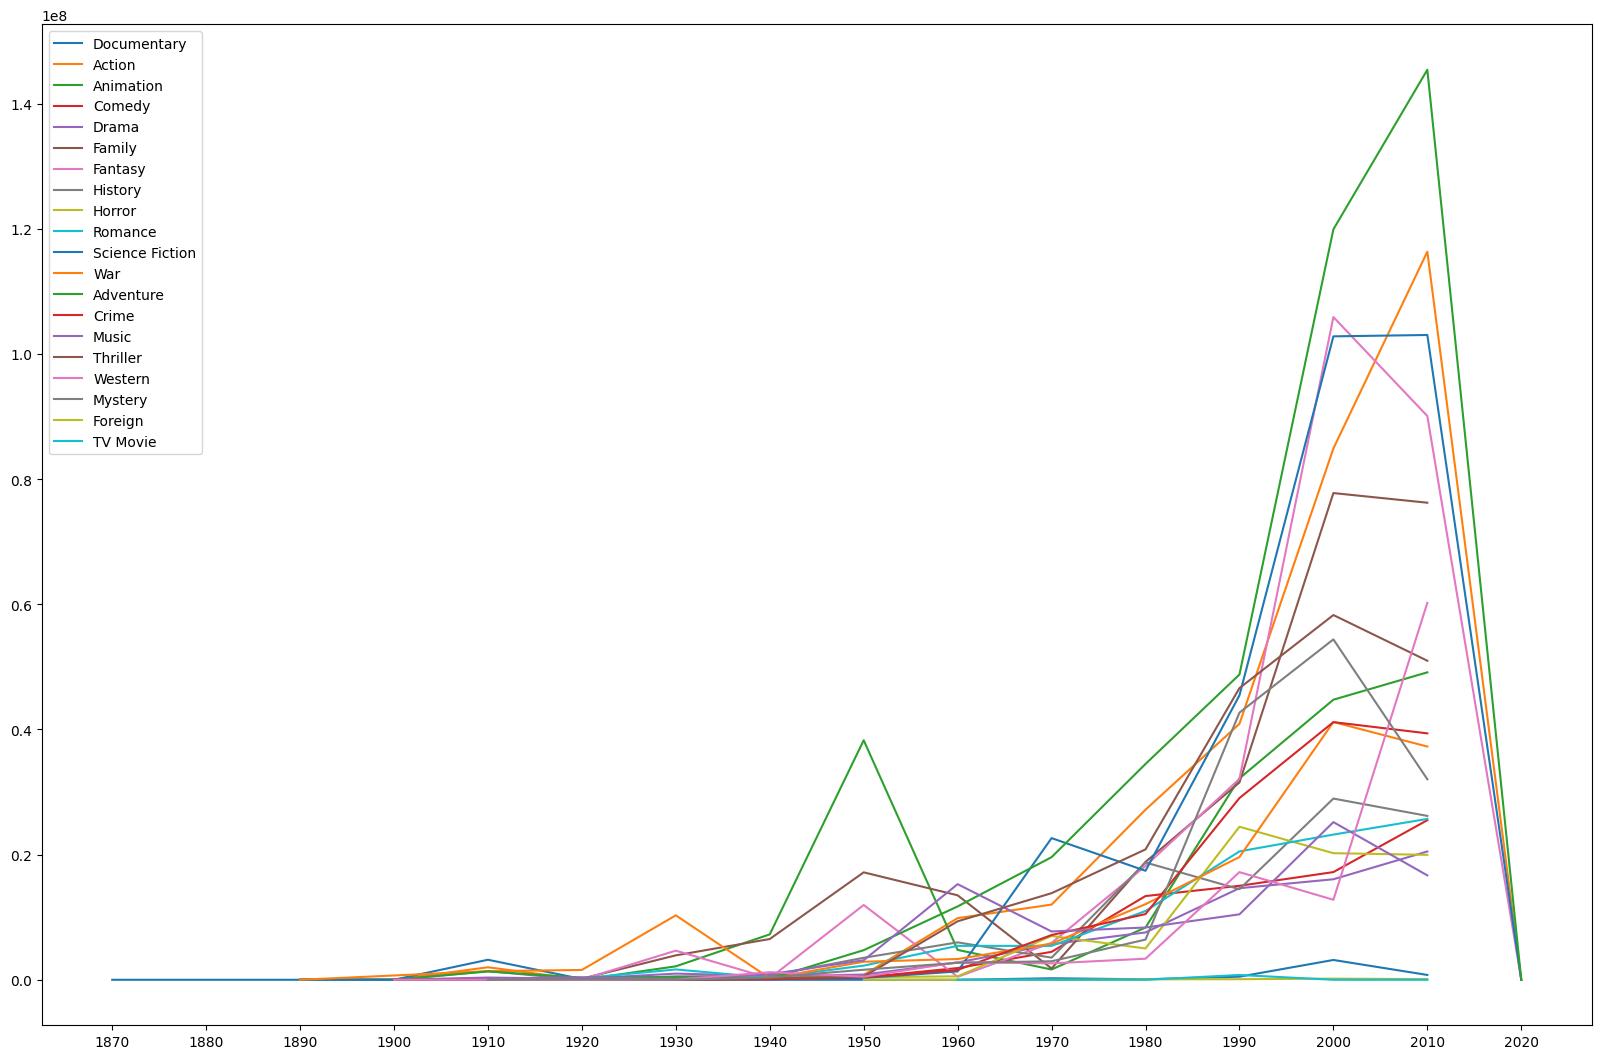

In [27]:
%matplotlib inline
plt.figure(figsize=(20,13))
for i in year_genre_revenue.genre_name.unique() :
  data_x = year_genre_revenue.query('genre_name == @i')['year']
  data_y = year_genre_revenue.query('genre_name == @i')['revenue']
  plt.plot(data_x, data_y)
plt.legend(year_genre_revenue.genre_name.unique(),loc = 'upper left')


In [28]:
# Attempt to convert 'popularity' and 'revenue' columns to numeric, coercing errors to NaN
movies['popularity'] = pd.to_numeric(movies['popularity'], errors='coerce')
movies['revenue'] = pd.to_numeric(movies['revenue'], errors='coerce')

# Now try calculating the correlation
movies[['popularity','revenue']].corr()

,popularity,revenue
popularity,1.000000,0.523459
revenue,0.523459,1.000000


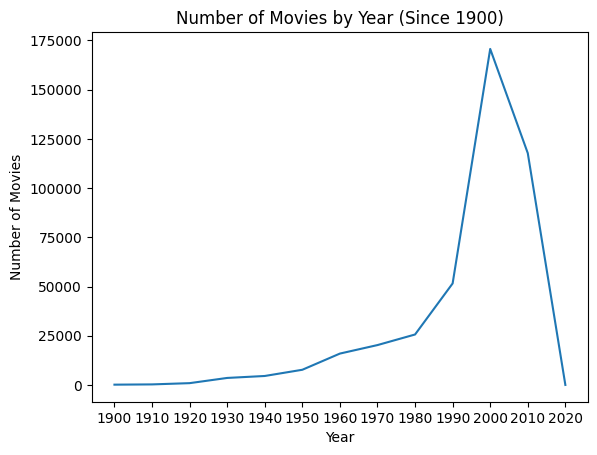

In [29]:
year_count = movies.query('year >= "1900"').groupby(['year'])['imdb_id'].count().reset_index()
plt.plot(year_count['year'], year_count['imdb_id'])
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies by Year (Since 1900)')
plt.show()

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
# 1990년 이후 데이터만 추출
movies_90s = movies[movies['year'] >= 1990]

# 'genre_names' 열이 여러 장르를 포함하는 경우 처리 (예: 'Action|Adventure|Sci-Fi')
# 여기서는 '|'로 구분된 장르를 분리하여 각 행에 하나의 장르만 남도록 처리합니다.
movies_90s['genre_name'] = movies_90s['genre_name'].str.split('|').str[0]

# 연도 및 장르별 영화 개봉 건수 계산
yearly_genre_counts = movies_90s.groupby(['year', 'genre_name'])['title'].count().unstack()

TypeError: '>=' not supported between instances of 'str' and 'int'

<Figure size 1200x800 with 0 Axes>

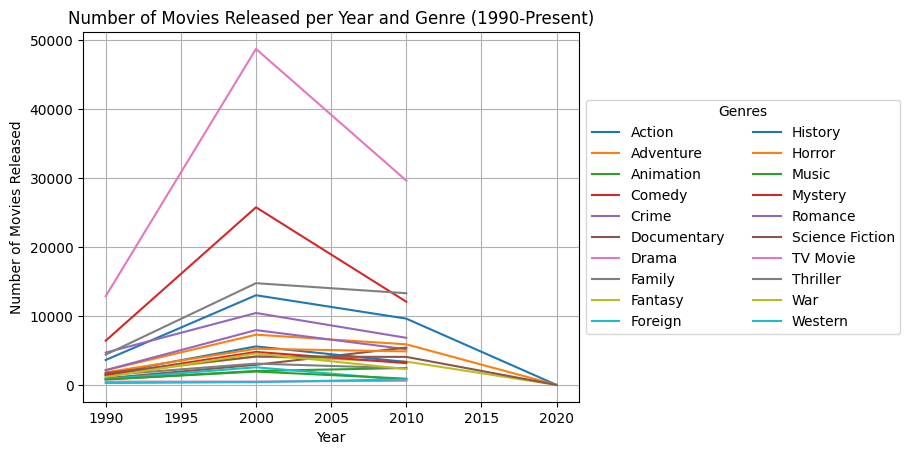

In [36]:
# 그래프 그리기
plt.figure(figsize=(12, 8))
yearly_genre_counts.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released per Year and Genre (1990-Present)')
plt.legend(title='Genres', loc='center left', bbox_to_anchor=(1, 0.5), ncol=2)  # 2개의 컬럼으로 표시
plt.grid(True)
plt.show()